<a href="https://colab.research.google.com/github/melltl/data_science_courses/blob/main/estatistica/estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estatistica descritiva

---



Ramo da estatistica que se ocupa em organizar e descrever os dados, que podem ser expressados em tabelas e garficos


##Posição

grau de concentração dos dados(media,mediana)

##Disperção

Quão disperso sao os vaslores dos dados

##Probabilidade

Permite descrever fenomenos de forma aleatoria ou seja aqueles em que estao presentes a incerteza

##Amostragem

Conjunto de tecnicas que permite selecionar uma amorstra da população, com o objetivo de obter informações de uma ou mais caracteristicas de interesse

##amostragem aleatoria simples

In [ ]:
#amostragem aleatoria simples
import pandas as pd



In [ ]:
df= pd.read_csv("covid19.csv")

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df_sample= df.sample(n=1000)

In [ ]:
df_sample.info()

In [ ]:
#especificando o tamanho da amostra
df_sample= df.sample(frac=0.10)

In [ ]:
df_sample.info()

In [ ]:
df_sample

## amostragem aleatoria estratificada
, na qual uma população é dividida em diferentes subgrupos, ou estratos, com base em características partilhadas.

In [ ]:
# amostragem aleatoria estratificada

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['province'].value_counts()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split (df.drop('province',axis=1), df['province'],stratify=df['province'],test_size=0.20)


In [ ]:
y_test.shape

In [ ]:
y_test.value_counts()
#20% de cada observacao

##amostragem sistematica
Quando os elementos da população se apresentam ordenados e a retirada dos elementos da amostra é feita periodicamente, temos uma amostragem sistemática. Assim, por exemplo, em uma linha de produção, podemos, a cada dez itens produzidos, retirar um para pertencer a uma amostra da produção diária.

In [ ]:
import numpy as np

In [ ]:
semente =np.random.choice(10,1)

In [ ]:
semente


In [ ]:
#gerando indices a partir da semente

In [ ]:
indices = np.arange(0,100,semente)

In [ ]:
indices

In [ ]:
#gerando a amostra a partir dos indices
amostra= df.loc[indices,:]

In [ ]:
amostra

#pre processamento de dados

##discretização
é tranformar valores que possam reprentar melhor os dados

In [ ]:
import pandas as pd

In [63]:
altura=[1.50,1.57,1.62,1.70,1.85,1.90]
altura=pd.qcut(altura,3,labels=['P','M','G'])
print(altura)

['P', 'P', 'M', 'M', 'G', 'G']
Categories (3, object): ['P' < 'M' < 'G']


In [58]:
df=pd.read_csv('kc_house_data.csv')

In [59]:
df.floors.value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [60]:
df['floors_labels']=pd.cut(df['floors'],5,labels=['PP','P','M','G', 'GG'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,PP
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,P
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,PP
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,PP
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,PP


In [64]:
df.floors_labels.value_counts()

PP    12589
P      8241
G       613
M       161
GG        8
Name: floors_labels, dtype: int64

##deteccao de anomalias

In [ ]:
import numpy
import pandas as pd
dados = [
    10, 386, 479, 627, 20, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 536, 433, 541,
    585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 573, 341, 545, 615, 548, 604, 439, 536,
    442, 461, 624, 611, 444, 578, 485, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 439, 597, 639, 529, 363, 711, 543,
    369, 130, 613, 501, 400,1300,30,1350,1400
]
dados

<Axes: >

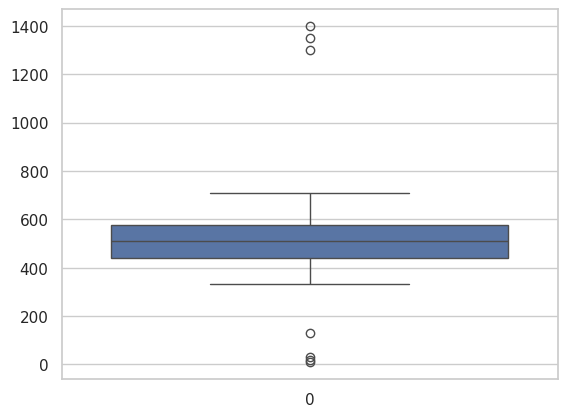

In [3]:

import seaborn as sns
sns.set(style="whitegrid",color_codes=True)
sns.boxplot(data=dados)

In [33]:
#fronteira de valor abaixo da media em duas vezs o desvio padrao
mean=numpy.mean(dados)
std=numpy.std(dados,axis=0)
valor_abaixo=mean -2 *std

valor_abaixo


105.06807435307127

In [12]:
#fronteira de valor acima da media em duas vezs o desvio padrao

mean +2 *std

0    942.520389
dtype: float64

In [35]:
#listando os valores abaixo da media
for x1 in dados:
    if x1 < valor_abaixo:
       print(x1)

10
20
30


In [37]:
#listando os valores acima da media
for x1 in dados:
    if x1 > mean + 2 * std:
       print(x1)

1300
1350
1400


In [39]:
#removendo os valores muito abaixo da media
dados= [x for x in dados if(x>mean-2*std)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 536, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 573, 341, 545, 615, 548, 604, 439, 536, 442, 461, 624, 611, 444, 578, 485, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 439, 597, 639, 529, 363, 711, 543, 369, 130, 613, 501, 400, 1300, 1350, 1400]


In [40]:
dados= [x for x in dados if(x<mean+2*std)]
print(dados)

[386, 479, 627, 523, 482, 483, 542, 699, 535, 617, 577, 471, 615, 583, 441, 562, 563, 527, 453, 536, 433, 541, 585, 704, 443, 569, 430, 637, 331, 511, 552, 496, 484, 566, 554, 472, 335, 440, 573, 341, 545, 615, 548, 604, 439, 536, 442, 461, 624, 611, 444, 578, 485, 487, 490, 496, 398, 512, 422, 455, 449, 432, 607, 439, 597, 639, 529, 363, 711, 543, 369, 130, 613, 501, 400]


<Axes: >

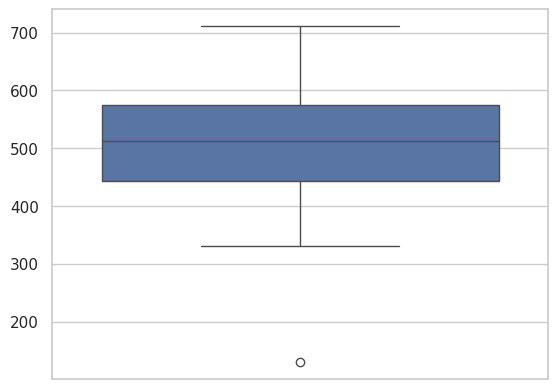

In [41]:
sns.boxplot(data=dados)

##Normalização
aplicar as mesmas normas aos dados

#Standartization
essat tecnica ignora a forma de distribuicao e transforma o dado de media para proximo de 0 e desvio padrao proximo de 1 assumindo que nao temos valores discrepantes

#Modelagem de dados


##bag of words
onde as palvras de uma sentenca sao reprensentadas atraves de um vetor
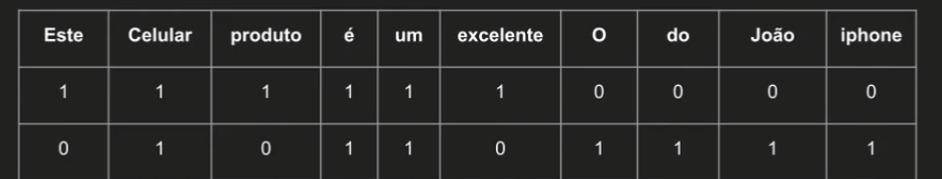